In [1]:
import pandas as pd

import numpy as np

In [81]:
import seaborn as sns
import matplotlib.pyplot as plt

In [82]:
df = pd.read_csv("cardiodata.csv",delimiter=';')

In [83]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [84]:
df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


<Axes: xlabel='height'>

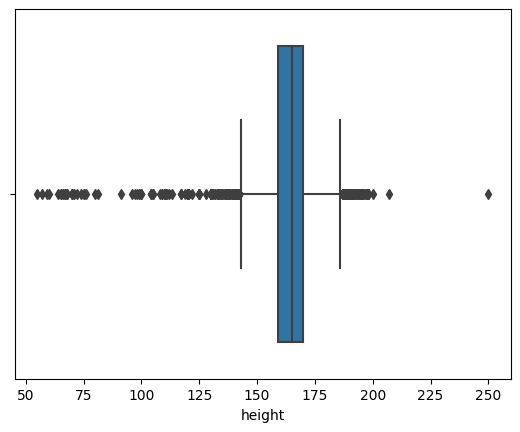

In [85]:
sns.boxplot(data = df, x = 'height')

<Axes: xlabel='ap_hi'>

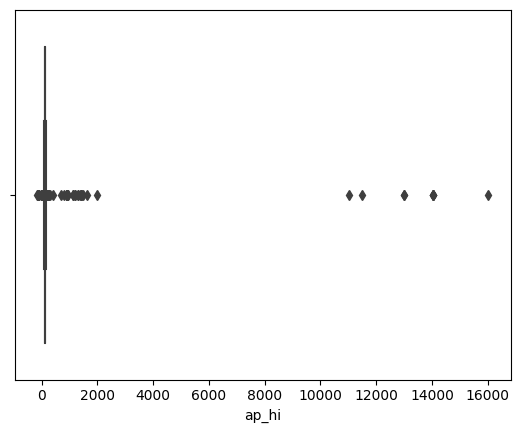

In [86]:
sns.boxplot(data = df, x = 'ap_hi')

<Axes: xlabel='weight'>

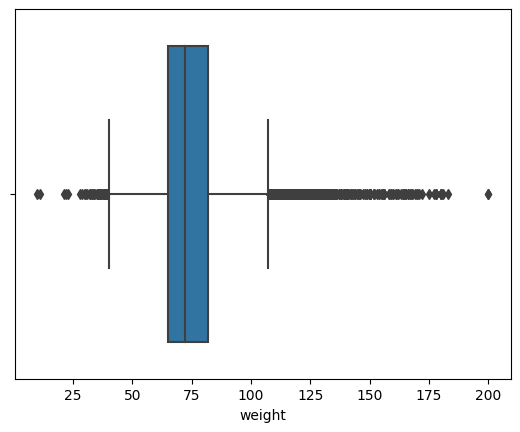

In [87]:
sns.boxplot(data = df, x = 'weight')

<Axes: xlabel='ap_lo'>

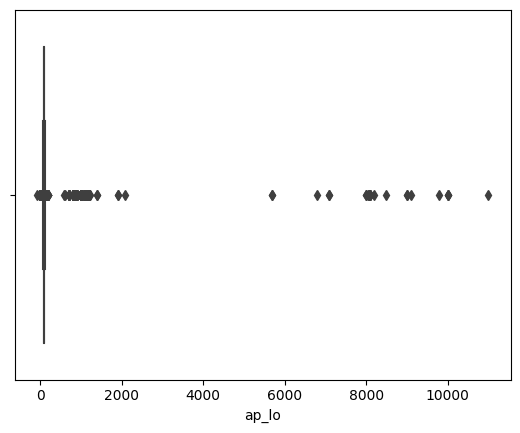

In [88]:
sns.boxplot(data = df, x = 'ap_lo')

In [89]:
Q1 = df['height'].quantile(0.25)
Q3 = df['height'].quantile(0.75)

# Calculate the IQR
IQR = Q3 - Q1

# Define the bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out the outliers
df = df[(df['height'] >= lower_bound) & (df['height'] <= upper_bound)]

In [90]:
Q1 = df['weight'].quantile(0.25)
Q3 = df['weight'].quantile(0.75)

# Calculate the IQR
IQR = Q3 - Q1

# Define the bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out the outliers
df = df[(df['weight'] >= lower_bound) & (df['weight'] <= upper_bound)]

In [91]:
Q1 = df['ap_hi'].quantile(0.25)
Q3 = df['ap_hi'].quantile(0.75)

# Calculate the IQR
IQR = Q3 - Q1

# Define the bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out the outliers
df = df[(df['ap_hi'] >= lower_bound) & (df['ap_hi'] <= upper_bound)]

In [92]:
Q1 = df['ap_lo'].quantile(0.25)
Q3 = df['ap_lo'].quantile(0.75)

# Calculate the IQR
IQR = Q3 - Q1

# Define the bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out the outliers
df = df[(df['ap_lo'] >= lower_bound) & (df['ap_lo'] <= upper_bound)]

In [93]:
df = df[~(df['ap_lo']> df['ap_hi'])]

In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 62503 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           62503 non-null  int64  
 1   age          62503 non-null  int64  
 2   gender       62503 non-null  int64  
 3   height       62503 non-null  int64  
 4   weight       62503 non-null  float64
 5   ap_hi        62503 non-null  int64  
 6   ap_lo        62503 non-null  int64  
 7   cholesterol  62503 non-null  int64  
 8   gluc         62503 non-null  int64  
 9   smoke        62503 non-null  int64  
 10  alco         62503 non-null  int64  
 11  active       62503 non-null  int64  
 12  cardio       62503 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.7 MB


In [95]:
df.isnull().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [96]:
"""Age | Objective Feature | age | int (days)
Height | Objective Feature | height | int (cm) |
Weight | Objective Feature | weight | float (kg) |
Gender | Objective Feature | gender | categorical code |
Systolic blood pressure | Examination Feature | ap_hi | int |
Diastolic blood pressure | Examination Feature | ap_lo | int |
Cholesterol | Examination Feature | cholesterol | 1: normal, 2: above normal, 3: well above normal |
Glucose | Examination Feature | gluc | 1: normal, 2: above normal, 3: well above normal |
Smoking | Subjective Feature | smoke | binary |
Alcohol intake | Subjective Feature | alco | binary |
Physical activity | Subjective Feature | active | binary |
Presence or absence of cardiovascular disease | Target Variable | cardio | binary |"""

'Age | Objective Feature | age | int (days)\nHeight | Objective Feature | height | int (cm) |\nWeight | Objective Feature | weight | float (kg) |\nGender | Objective Feature | gender | categorical code |\nSystolic blood pressure | Examination Feature | ap_hi | int |\nDiastolic blood pressure | Examination Feature | ap_lo | int |\nCholesterol | Examination Feature | cholesterol | 1: normal, 2: above normal, 3: well above normal |\nGlucose | Examination Feature | gluc | 1: normal, 2: above normal, 3: well above normal |\nSmoking | Subjective Feature | smoke | binary |\nAlcohol intake | Subjective Feature | alco | binary |\nPhysical activity | Subjective Feature | active | binary |\nPresence or absence of cardiovascular disease | Target Variable | cardio | binary |'

In [97]:
#1) age is in days lets convert it into years 
df['age'] = df['age']/365
df['age'] = df['age'].astype(int)

In [98]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,50,2,168,62.0,110,80,1,1,0,0,1,0
1,1,55,1,156,85.0,140,90,3,1,0,0,1,1
2,2,51,1,165,64.0,130,70,3,1,0,0,0,1
3,3,48,2,169,82.0,150,100,1,1,0,0,1,1
5,8,60,1,151,67.0,120,80,2,2,0,0,0,0


In [99]:
df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,62503.000000,62503.000000,62503.000000,62503.000000,62503.000000,62503.000000,62503.000000,62503.000000,62503.000000,62503.000000,62503.000000,62503.000000,62503.000000
mean,49941.612467,52.907876,1.348543,164.405709,73.180301,126.420956,81.698318,1.357711,1.220645,0.086332,0.052157,0.804329,0.493880
std,28864.807826,6.743220,0.476513,7.531092,12.271986,14.288768,7.672788,0.675199,0.567598,0.280856,0.222346,0.396719,0.499967
min,0.000000,29.000000,1.000000,143.000000,40.000000,90.000000,65.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,24875.500000,48.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,49980.000000,54.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74852.500000,58.000000,2.000000,170.000000,81.000000,140.000000,90.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,64.000000,2.000000,186.000000,107.000000,170.000000,105.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [100]:
#2) here gender 2 refers to male and 1 refers to female 
def gender(num):
    if num==2:
        return "male"
    else:
        return "female"
df['gender'] = df['gender'].apply(gender)


In [101]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,50,male,168,62.0,110,80,1,1,0,0,1,0
1,1,55,female,156,85.0,140,90,3,1,0,0,1,1
2,2,51,female,165,64.0,130,70,3,1,0,0,0,1
3,3,48,male,169,82.0,150,100,1,1,0,0,1,1
5,8,60,female,151,67.0,120,80,2,2,0,0,0,0


In [102]:
# with the help of weight and height we can convert it into bmi and then can remove height and weight column 
# formula for bmi = (height(in meters))^2/weight in kg

#here in our data height is in cm so we have to convert it into meters
df['height'] = df['height']/100

In [103]:
df['bmi'] = df['weight']/(df['height']*df['height'])

In [104]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi
0,0,50,male,1.68,62.0,110,80,1,1,0,0,1,0,21.967120
1,1,55,female,1.56,85.0,140,90,3,1,0,0,1,1,34.927679
2,2,51,female,1.65,64.0,130,70,3,1,0,0,0,1,23.507805
3,3,48,male,1.69,82.0,150,100,1,1,0,0,1,1,28.710479
5,8,60,female,1.51,67.0,120,80,2,2,0,0,0,0,29.384676


In [105]:
df.drop(columns=['height','weight','id'],inplace = True)

In [106]:
df.head()

,age,gender,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi
0,50,male,110,80,1,1,0,0,1,0,21.967120
1,55,female,140,90,3,1,0,0,1,1,34.927679
2,51,female,130,70,3,1,0,0,0,1,23.507805
3,48,male,150,100,1,1,0,0,1,1,28.710479
5,60,female,120,80,2,2,0,0,0,0,29.384676


In [107]:
def bmi(num):
    if num< 18.5: 
        return "Underweight"
    elif num>18.5 and num<24.9:
        return "Optimum range"
    elif num>25.0 and num<29.9:
        return "Overweight"
    else:
        return "Obesity"

df['bmi'] = df['bmi'].apply(bmi)

In [108]:
df.head()

,age,gender,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi
0,50,male,110,80,1,1,0,0,1,0,Optimum range
1,55,female,140,90,3,1,0,0,1,1,Obesity
2,51,female,130,70,3,1,0,0,0,1,Optimum range
3,48,male,150,100,1,1,0,0,1,1,Overweight
5,60,female,120,80,2,2,0,0,0,0,Overweight


In [109]:
"""Normal: Systolic < 120 mm Hg and Diastolic < 80 mm Hg
Elevated: Systolic 120-129 mm Hg and Diastolic < 80 mm Hg
Hypertension Stage 1: Systolic 130-139 mm Hg or Diastolic 80-89 mm Hg
Hypertension Stage 2: Systolic ≥ 140 mm Hg or Diastolic ≥ 90 mm Hg"""

'Normal: Systolic < 120 mm Hg and Diastolic < 80 mm Hg\nElevated: Systolic 120-129 mm Hg and Diastolic < 80 mm Hg\nHypertension Stage 1: Systolic 130-139 mm Hg or Diastolic 80-89 mm Hg\nHypertension Stage 2: Systolic ≥ 140 mm Hg or Diastolic ≥ 90 mm Hg'

In [110]:
def bp_levels(row):
    if row["ap_hi"]<120 and row["ap_lo"]<80:
        return "Normal"

    elif row["ap_hi"]<130 and row["ap_lo"]<80:
        return "elevated" 

    elif row["ap_hi"]<140 or row["ap_lo"]<90:
        return "Hypertension Stage 1"

    elif row["ap_hi"]>=140 or row["ap_lo"]>=90:
        return "Hypertension Stage 2"

df['bp_levels'] = df.apply(bp_levels, axis = 1)

In [111]:
df.head()

,age,gender,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi,bp_levels
0,50,male,110,80,1,1,0,0,1,0,Optimum range,Hypertension Stage 1
1,55,female,140,90,3,1,0,0,1,1,Obesity,Hypertension Stage 2
2,51,female,130,70,3,1,0,0,0,1,Optimum range,Hypertension Stage 1
3,48,male,150,100,1,1,0,0,1,1,Overweight,Hypertension Stage 2
5,60,female,120,80,2,2,0,0,0,0,Overweight,Hypertension Stage 1


In [112]:
df.drop(columns = ['ap_hi','ap_lo'],inplace = True)

In [113]:
def cholesterol(num):
    if num==1:
        return "normal" 

    elif num==2:
        return "above normal"

    else:
        return "well above normal"

df['cholesterol'] = df['cholesterol'].apply(cholesterol)

In [114]:
def glucose(num):
    if num==1:
        return "normal" 

    elif num==2:
        return "above normal"

    else:
        return "well above normal"

df['gluc'] = df['gluc'].apply(glucose)

In [115]:
df = df[['age','gender','bp_levels','bmi','cholesterol','gluc','smoke','alco','active','cardio']]

In [116]:
df.head()

,age,gender,bp_levels,bmi,cholesterol,gluc,smoke,alco,active,cardio
0,50,male,Hypertension Stage 1,Optimum range,normal,normal,0,0,1,0
1,55,female,Hypertension Stage 2,Obesity,well above normal,normal,0,0,1,1
2,51,female,Hypertension Stage 1,Optimum range,well above normal,normal,0,0,0,1
3,48,male,Hypertension Stage 2,Overweight,normal,normal,0,0,1,1
5,60,female,Hypertension Stage 1,Overweight,above normal,above normal,0,0,0,0


C:\Users\dhruv\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\dhruv\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\dhruv\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\dhruv\App

Text(0.5, 1.0, 'Histogram of Age with Heart disease')

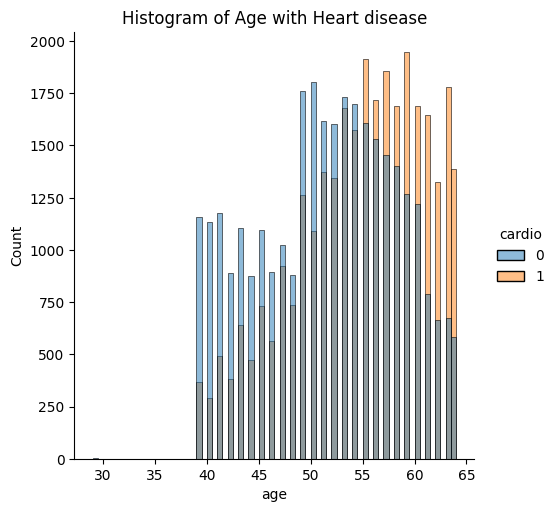

In [117]:
sns.displot(data = df,x = 'age',hue = 'cardio')
plt.title("Histogram of Age with Heart disease")

In [118]:
# obs :
"""
1) in above observation it is seen that as age is increasing the chances of getting heart disease or cardiac disease increases.
2) in age below 50 blue layer is dominating on orange layer but after age 50 orange layer is dominating .
"""

'\n1) in above observation it is seen that as age is increasing the chances of getting heart disease or cardiac disease increases.\n2) in age below 50 blue layer is dominating on orange layer but after age 50 orange layer is dominating .\n'

<Axes: ylabel='count'>

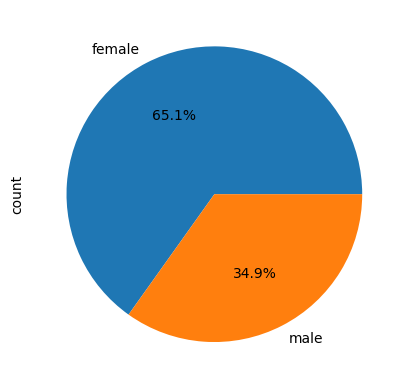

In [119]:
df['gender'].value_counts().plot(kind = 'pie',autopct='%1.1f%%')

In [120]:
#obs
"""
1) in our data females are twice as male.
2) male = 24470, female = 45530
"""

'\n1) in our data females are twice as male.\n2) male = 24470, female = 45530\n'

In [121]:
crosstab = round(pd.crosstab(df['gender'],df['cardio'],normalize='index')*100,2)
crosstab

cardio,0,1
gender,,
female,50.44,49.56
male,50.94,49.06


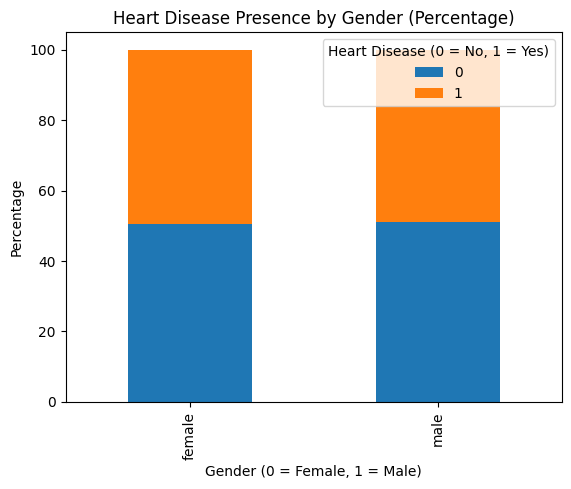

In [122]:
crosstab.plot(kind = 'bar', stacked = True)
plt.title('Heart Disease Presence by Gender (Percentage)')
plt.xlabel('Gender (0 = Female, 1 = Male)')
plt.ylabel('Percentage')
plt.legend(title='Heart Disease (0 = No, 1 = Yes)')

In [123]:
#obs 
"""
1) in our data male and female which are suffering from heart disease are same % wise.
2) and vice versa is also true that same number of males and females are not suffering from any heart disease % wise.
"""

'\n1) in our data male and female which are suffering from heart disease are same % wise.\n2) and vice versa is also true that same number of males and females are not suffering from any heart disease % wise.\n'

In [124]:
df.head()

,age,gender,bp_levels,bmi,cholesterol,gluc,smoke,alco,active,cardio
0,50,male,Hypertension Stage 1,Optimum range,normal,normal,0,0,1,0
1,55,female,Hypertension Stage 2,Obesity,well above normal,normal,0,0,1,1
2,51,female,Hypertension Stage 1,Optimum range,well above normal,normal,0,0,0,1
3,48,male,Hypertension Stage 2,Overweight,normal,normal,0,0,1,1
5,60,female,Hypertension Stage 1,Overweight,above normal,above normal,0,0,0,0


<Axes: ylabel='count'>

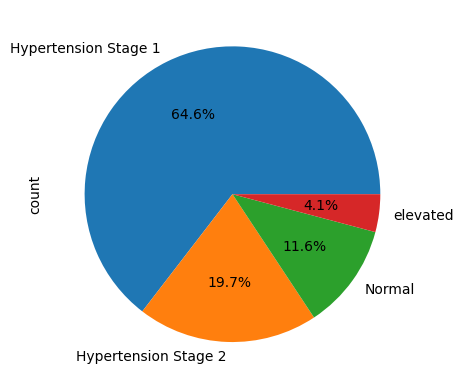

In [125]:
df['bp_levels'].value_counts().plot(kind = 'pie',autopct='%1.1f%%')

In [126]:
crosstab = round(pd.crosstab(df['bp_levels'],df['cardio'],normalize='index')*100,2)
crosstab

cardio,0,1
bp_levels,,
Hypertension Stage 1,55.36,44.64
Hypertension Stage 2,15.93,84.07
Normal,77.17,22.83
elevated,67.86,32.14


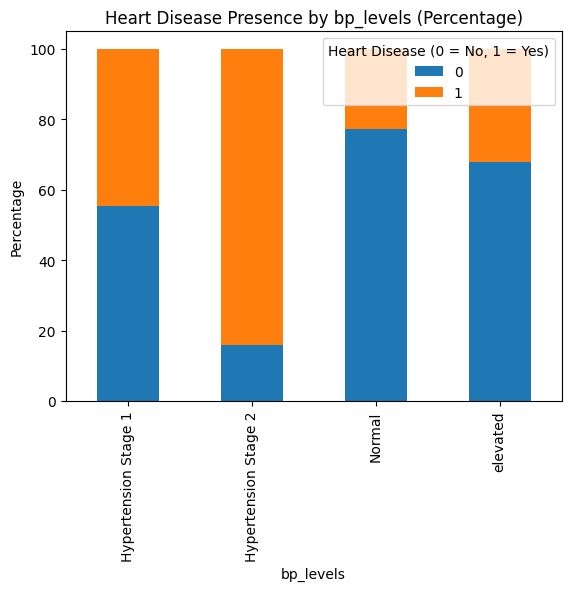

In [127]:
crosstab.plot(kind = 'bar', stacked = True)
plt.title('Heart Disease Presence by bp_levels (Percentage)')
plt.ylabel('Percentage')
plt.legend(title='Heart Disease (0 = No, 1 = Yes)')

In [128]:
# observation 
"""
1) Heart disease is quite dependable on blood pressure levels.
2) blood pressure levels are of 2 types systolic blood pressures and diastolic blood pressure.
3) on the basis of both blood pressures it is further classified into 4 types.
-->Normal Blood Pressure: Systolic less than 120 mm Hg and diastolic less than 80 mm Hg.
-->Elevated Blood Pressure: Systolic between 120-129 mm Hg and diastolic less than 80 mm Hg.
-->Hypertension Stage 1: Systolic between 130-139 mm Hg or diastolic between 80-89 mm Hg.
-->Hypertension Stage 2: Systolic 140 mm Hg or higher or diastolic 90 mm Hg or higher.
4) from the above graph the chances of heart problems or disease increases as blood pressure level increases.
"""

'\n1) Heart disease is quite dependable on blood pressure levels.\n2) blood pressure levels are of 2 types systolic blood pressures and diastolic blood pressure.\n3) on the basis of both blood pressures it is further classified into 4 types.\n-->Normal Blood Pressure: Systolic less than 120 mm Hg and diastolic less than 80 mm Hg.\n-->Elevated Blood Pressure: Systolic between 120-129 mm Hg and diastolic less than 80 mm Hg.\n-->Hypertension Stage 1: Systolic between 130-139 mm Hg or diastolic between 80-89 mm Hg.\n-->Hypertension Stage 2: Systolic 140 mm Hg or higher or diastolic 90 mm Hg or higher.\n4) from the above graph the chances of heart problems or disease increases as blood pressure level increases.\n'

<Axes: ylabel='count'>

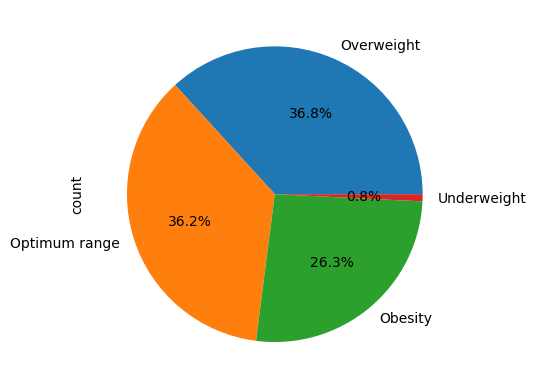

In [129]:
df['bmi'].value_counts().plot(kind = 'pie',autopct='%1.1f%%')

In [130]:
crosstab = round(pd.crosstab(df['bmi'],df['cardio'],normalize='index')*100,2)
crosstab

cardio,0,1
bmi,,
Obesity,39.41,60.59
Optimum range,59.63,40.37
Overweight,49.30,50.70
Underweight,71.28,28.72


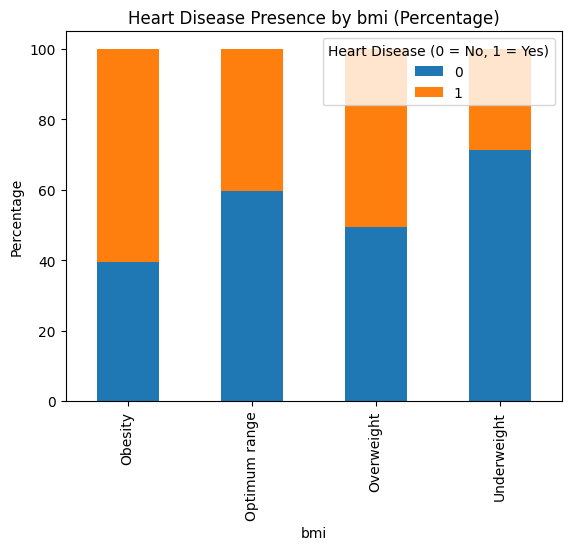

In [131]:
crosstab.plot(kind = 'bar', stacked = True)
plt.title('Heart Disease Presence by bmi (Percentage)')
plt.ylabel('Percentage')
plt.legend(title='Heart Disease (0 = No, 1 = Yes)')

In [132]:
# observation 
"""
1) just like blood pressure, heart problems are depend on bmi 
2) bmi has 4 levels :
--> if bmi<18.5 : underweight 
--> if bmi>18.5 or bmi<25 : normal 
--> if bmi>25 and bmi<30 : overweight 
--> if bmi>30 : obesity
and as bmi increases towards obesity heart related problems increases 
"""

'\n1) just like blood pressure, heart problems are depend on bmi \n2) bmi has 4 levels :\n--> if bmi<18.5 : underweight \n--> if bmi>18.5 or bmi<25 : normal \n--> if bmi>25 and bmi<30 : overweight \n--> if bmi>30 : obesity\nand as bmi increases towards obesity heart related problems increases \n'

<Axes: ylabel='count'>

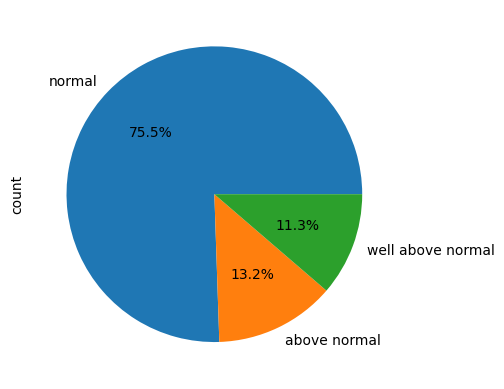

In [133]:
df['cholesterol'].value_counts().plot(kind = 'pie',autopct='%1.1f%%')

In [134]:
crosstab = round(pd.crosstab(df['cholesterol'],df['cardio'],normalize='index')*100,2)
crosstab

cardio,0,1
cholesterol,,
above normal,40.43,59.57
normal,56.38,43.62
well above normal,23.96,76.04


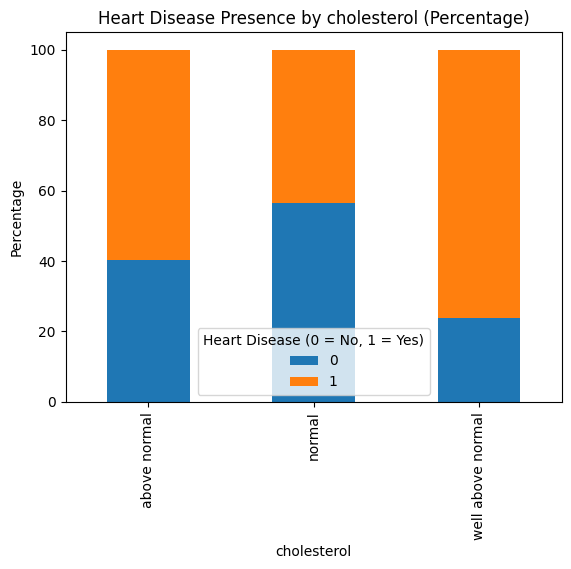

In [135]:
crosstab.plot(kind = 'bar', stacked = True)
plt.title('Heart Disease Presence by cholesterol (Percentage)')
plt.ylabel('Percentage')
plt.legend(title='Heart Disease (0 = No, 1 = Yes)')

In [136]:
# obs 
"""
cholestrol is also reason for heart problems as heart problems increases with colestrol.
"""

'\ncholestrol is also reason for heart problems as heart problems increases with colestrol.\n'

<Axes: ylabel='count'>

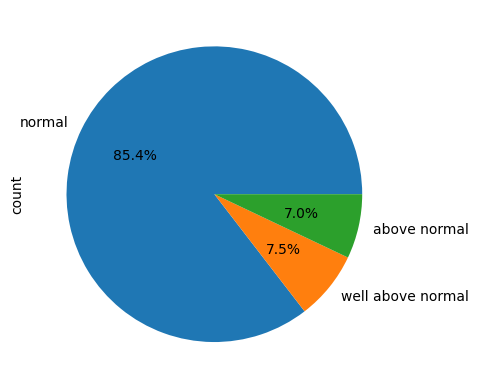

In [137]:
df['gluc'].value_counts().plot(kind = 'pie',autopct='%1.1f%%')

In [138]:
crosstab = round(pd.crosstab(df['gluc'],df['cardio'],normalize='index')*100,2)
crosstab

cardio,0,1
gluc,,
above normal,41.95,58.05
normal,52.39,47.61
well above normal,38.47,61.53


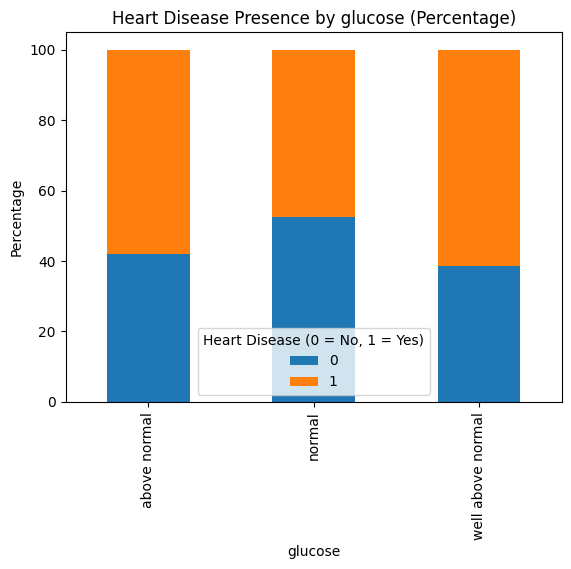

In [139]:
crosstab.plot(kind = 'bar', stacked = True)
plt.title('Heart Disease Presence by glucose (Percentage)')
plt.xlabel('glucose')
plt.ylabel('Percentage')
plt.legend(title='Heart Disease (0 = No, 1 = Yes)')

In [140]:
#obs
"""
1) even with more glucose level it has chance of heart disease.
"""

'\n1) even with more glucose level it has chance of heart disease.\n'

<Axes: ylabel='count'>

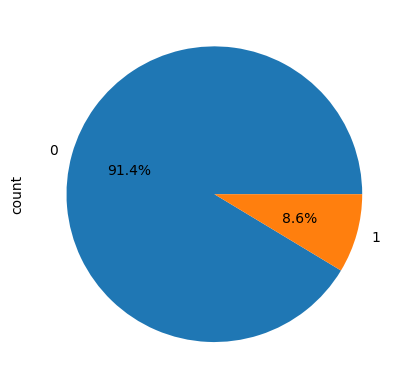

In [141]:
df['smoke'].value_counts().plot(kind = 'pie',autopct='%1.1f%%')

In [142]:
crosstab = round(pd.crosstab(df['smoke'],df['cardio'],normalize='index')*100,2)
crosstab

cardio,0,1
smoke,,
0,50.27,49.73
1,54.21,45.79


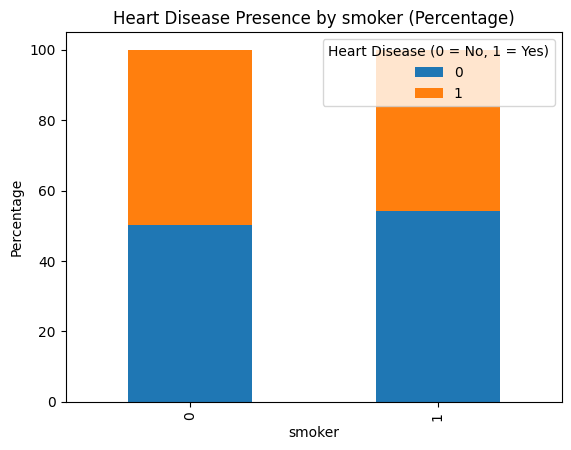

In [143]:
crosstab.plot(kind = 'bar', stacked = True)
plt.title('Heart Disease Presence by smoker (Percentage)')
plt.xlabel('smoker')
plt.ylabel('Percentage')
plt.legend(title='Heart Disease (0 = No, 1 = Yes)')

<Axes: ylabel='count'>

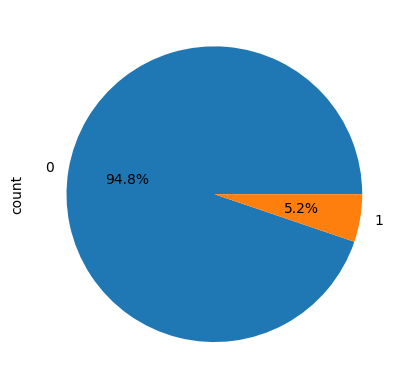

In [144]:
df['alco'].value_counts().plot(kind = 'pie',autopct='%1.1f%%')

In [145]:
crosstab = round(pd.crosstab(df['alco'],df['cardio'],normalize='index')*100,2)
crosstab

cardio,0,1
alco,,
0,50.47,49.53
1,53.25,46.75


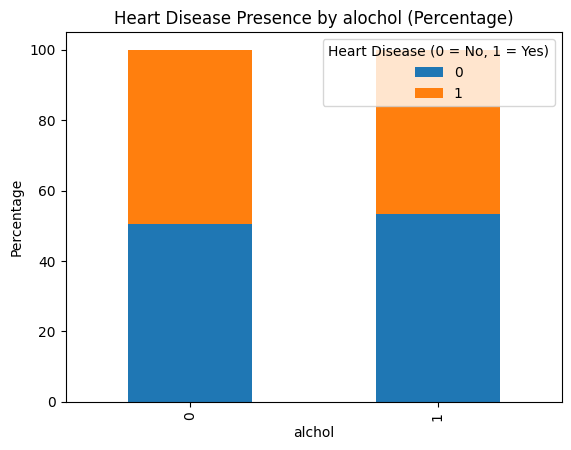

In [146]:
crosstab.plot(kind = 'bar', stacked = True)
plt.title('Heart Disease Presence by alochol (Percentage)')
plt.ylabel('Percentage')
plt.xlabel('alchol')
plt.legend(title='Heart Disease (0 = No, 1 = Yes)')

<Axes: ylabel='count'>

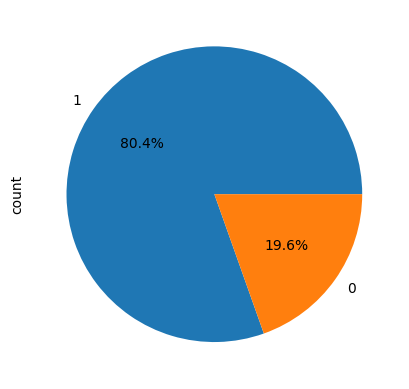

In [147]:
df['active'].value_counts().plot(kind = 'pie',autopct='%1.1f%%')

In [148]:
crosstab = round(pd.crosstab(df['active'],df['cardio'],normalize='index')*100,2)
crosstab

cardio,0,1
active,,
0,46.79,53.21
1,51.54,48.46


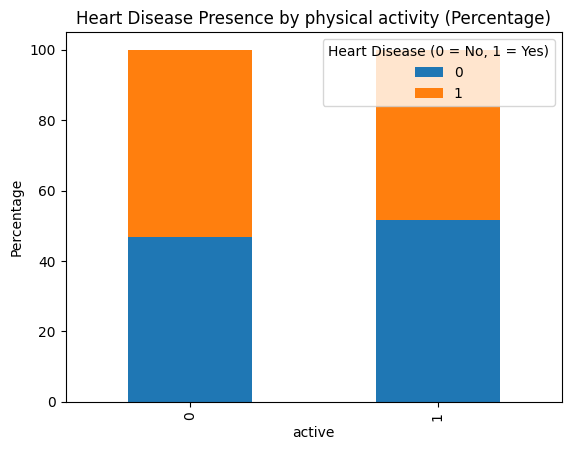

In [149]:
crosstab.plot(kind = 'bar', stacked = True)
plt.title('Heart Disease Presence by physical activity (Percentage)')
plt.ylabel('Percentage')
plt.legend(title='Heart Disease (0 = No, 1 = Yes)')

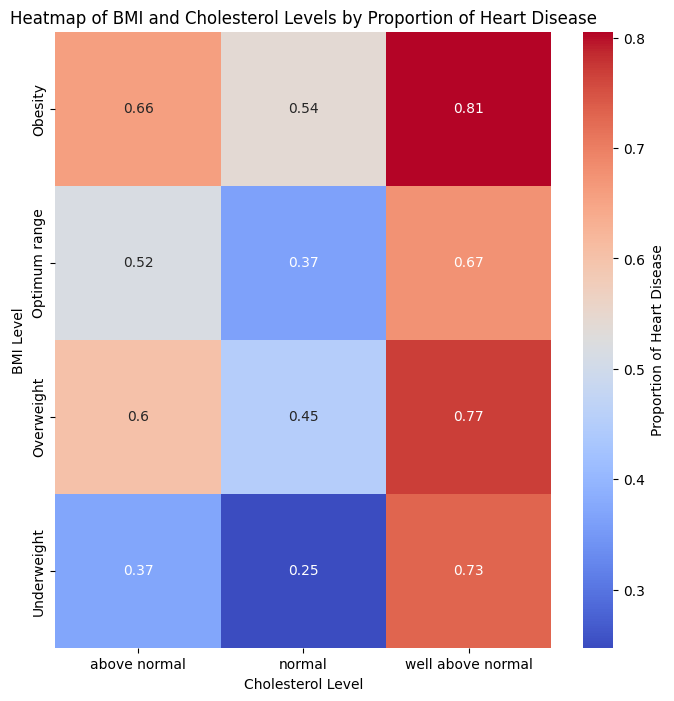

In [150]:
pivot_table = df.pivot_table(values='cardio', index='bmi', columns='cholesterol', aggfunc='mean')

# Create a heatmap
plt.figure(figsize=(8, 8))
sns.heatmap(pivot_table, annot=True, cmap='coolwarm', cbar_kws={'label': 'Proportion of Heart Disease'})
plt.title('Heatmap of BMI and Cholesterol Levels by Proportion of Heart Disease')
plt.xlabel('Cholesterol Level')
plt.ylabel('BMI Level')
plt.show()

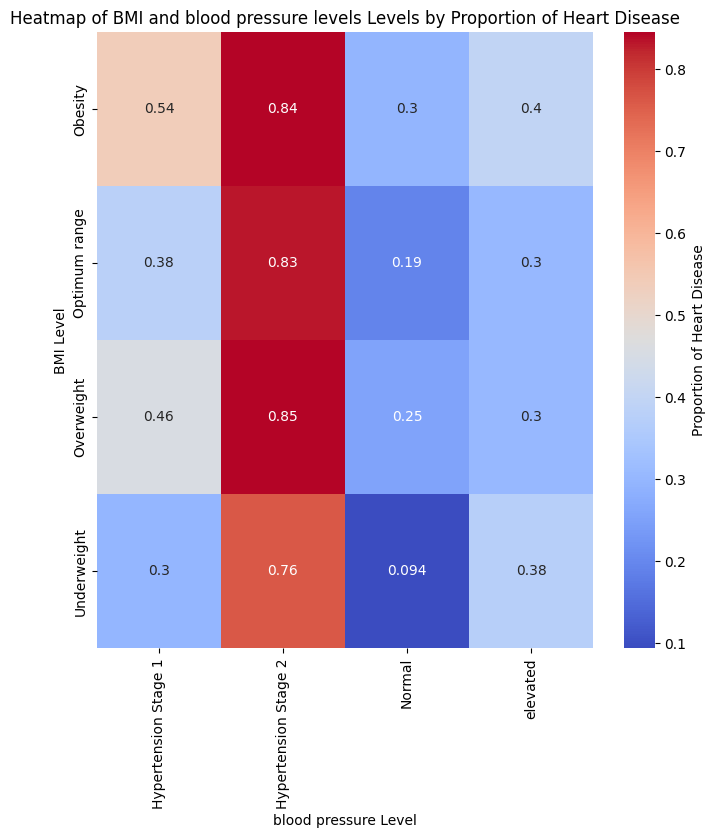

In [151]:
pivot_table = df.pivot_table(values='cardio', index='bmi', columns='bp_levels', aggfunc='mean')

# Create a heatmap
plt.figure(figsize=(8, 8))
sns.heatmap(pivot_table, annot=True, cmap='coolwarm', cbar_kws={'label': 'Proportion of Heart Disease'})
plt.title('Heatmap of BMI and blood pressure levels Levels by Proportion of Heart Disease')
plt.xlabel('blood pressure Level')
plt.ylabel('BMI Level')
plt.show()

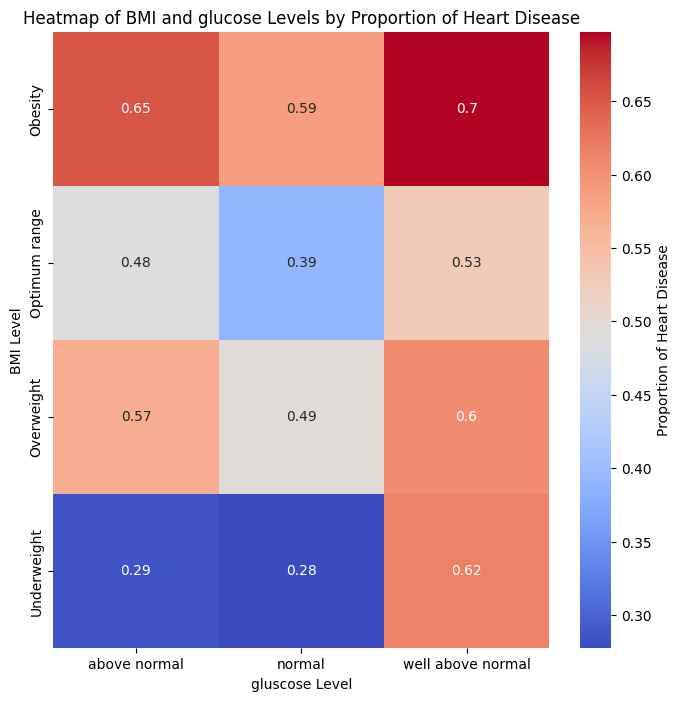

In [152]:
pivot_table = df.pivot_table(values='cardio', index='bmi', columns='gluc', aggfunc='mean')

# Create a heatmap
plt.figure(figsize=(8, 8))
sns.heatmap(pivot_table, annot=True, cmap='coolwarm', cbar_kws={'label': 'Proportion of Heart Disease'})
plt.title('Heatmap of BMI and glucose Levels by Proportion of Heart Disease')
plt.xlabel('gluscose Level')
plt.ylabel('BMI Level')
plt.show()

In [156]:
pip show matplotlib

Name: matplotlib
Version: 3.7.2
Summary: Python plotting package
Home-page: https://matplotlib.org
Author: John D. Hunter, Michael Droettboom
Author-email: matplotlib-users@python.org
License: PSF
Location: C:\Users\dhruv\AppData\Local\Programs\Python\Python311\Lib\site-packages
Requires: contourpy, cycler, fonttools, kiwisolver, numpy, packaging, pillow, pyparsing, python-dateutil
Required-by: dtreeviz, seaborn
Note: you may need to restart the kernel to use updated packages.
